In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/HP/OneDrive/Documents/PYTHON/PANDAS/DATABASES/medical_examination.csv')

In [146]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
    Adding an Overweight Column
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    To determine if a person is overweight, we first need to calculate the BMI (Body Mass Index). The formula is:

BMI = weight (kg) / (height (m))^2.
    If BMI is greater than 25, the person is considered overweight.
</div>

In [151]:
df['bmi'] = df['weight']/(df['height']/100)**2
df['overweight'] = (df['bmi']>25).astype(int)

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   Normalizing Cholesterol and Glucose Columns
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    To normalize the values of cholesterol and gluc, setting:

1 = 0 (normal)
2 or 3 = 1 (above normal)
</div>

In [154]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [156]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   Creating a DataFrame for the Cat Plot
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    I used pd.mellt() to reshape the dataframe for the categorical plot. The columns used are cholesterol, gluc, smoke, alco, active, and overweight
</div>

In [219]:
columns = [
  'active',
  'alco',
  'cholesterol',
  'gluc',
  'overweight',
  'smoke'
]
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=columns)
df_cat = df_cat.reset_index() \
            .groupby(['variable', 'cardio', 'value']) \
            .agg('count') \
            .rename(columns={'index': 'total'}) \
            .reset_index()

In [221]:
df_cat.head()

,variable,cardio,value,total
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   Creating the Categorical Plot
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Creating a catplot using seaborn.
</div>

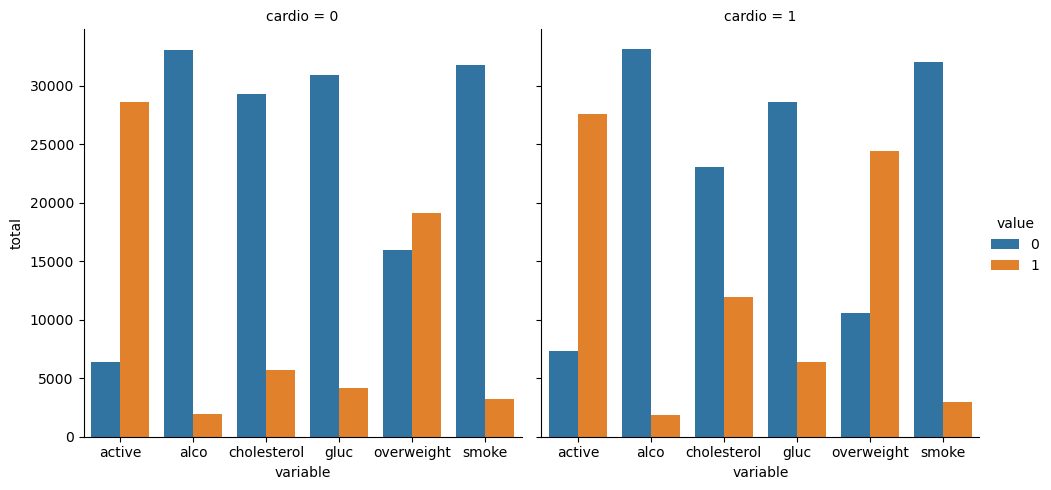

In [225]:
fig = sns.catplot(
    x="variable",
    y="total",
    col="cardio",
    hue="value",
    data=df_cat,
    kind="bar").fig
plt.show()

<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   Clean the Data for the Heat Map
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Filter the dataset to remove incorrect entries. For example, diastolic pressure should never be higher than systolic.
</div>

In [230]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &  # Diastolic pressure should be less than or equal to systolic
    (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &  # Height within 2.5th and 97.5th percentile
    (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))  # Weight within 2.5th and 97.5th percentile
]

In [232]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


<div style="text-align: justify; font-size: 20px; color: #007acc; font-family: Garamond; font-weight: bold">
   Generate the Correlation Matrix
</div>
<div style="text-align: justify; font-size: 14px; color: #000000; font-family: Garamond; font-weight: bold">
    Now, let's calculate the correlation matrix and plot it using a heatmap
</div>

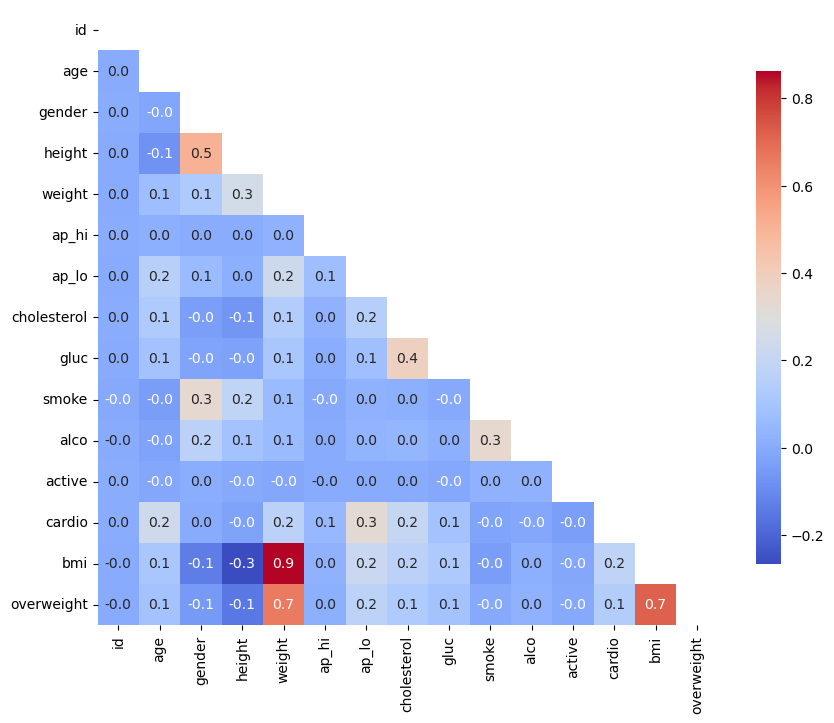

In [235]:
corr = df_heat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'shrink': 0.8})

plt.show()